In [1]:
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.callbacks import ReduceLROnPlateau
from keras.applications import ResNet50

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
y_train = train_df["label"].values
x_train = train_df[train_df.keys().drop(["label"])].values.reshape(-1,28,28,1)
x_train = x_train/255

In [4]:
test = test_df.values
test = test/255
test = test.reshape(-1, 28,28,1)

In [5]:
y_train = to_categorical(y_train, num_classes=10)

In [6]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

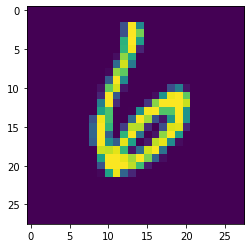

In [8]:
plt.imshow(x_train[0][:,:,0])

In [9]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation="relu", padding="Same"))
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="Same"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="Same"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="Same"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation="softmax"))
# model.summary()

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
igen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1
)
igen.fit(x_train)

In [12]:
lr = ReduceLROnPlateau(min_lr=0.00001, patience=3, verbose=1, factor=0.5, monitor="val_acc")

In [13]:
model.fit(igen.flow(x_train, y_train, batch_size=16), epochs=20, validation_data=(x_val, y_val),
         verbose = 2, steps_per_epoch=x_train.shape[0] // 16, callbacks=[lr])

Epoch 1/20
 - 39s - loss: 0.2783 - accuracy: 0.9127 - val_loss: 0.0715 - val_accuracy: 0.9783
Epoch 2/20


c:\users\ashuk\.conda\envs\tensorflow_env\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 39s - loss: 0.1203 - accuracy: 0.9630 - val_loss: 0.0421 - val_accuracy: 0.9858
Epoch 3/20
 - 34s - loss: 0.0954 - accuracy: 0.9713 - val_loss: 0.0364 - val_accuracy: 0.9883
Epoch 4/20
 - 33s - loss: 0.0886 - accuracy: 0.9733 - val_loss: 0.0450 - val_accuracy: 0.9852
Epoch 5/20
 - 41s - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 6/20
 - 43s - loss: 0.0682 - accuracy: 0.9805 - val_loss: 0.0235 - val_accuracy: 0.9923
Epoch 7/20
 - 44s - loss: 0.0597 - accuracy: 0.9831 - val_loss: 0.0202 - val_accuracy: 0.9938
Epoch 8/20
 - 37s - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.0204 - val_accuracy: 0.9938
Epoch 9/20
 - 37s - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.0200 - val_accuracy: 0.9942
Epoch 10/20
 - 38s - loss: 0.0487 - accuracy: 0.9861 - val_loss: 0.0294 - val_accuracy: 0.9904
Epoch 11/20
 - 37s - loss: 0.0421 - accuracy: 0.9879 - val_loss: 0.0174 - val_accuracy: 0.9945
Epoch 12/20
 - 37s - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.01

In [14]:
result = model.predict(test)

In [15]:
result = np.argmax(result, axis=1)

In [16]:
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [17]:
sub = pd.read_csv("sample_submission (1).csv")

In [18]:
sub["Label"] = result

In [19]:
sub.to_csv("try4.csv", index=False)